# Image Feature Extraction in OpenCV: Edges and Corners

In the world of computer vision and image processing, the ability to extract meaningful features from images is important. These features serve as vital inputs for various downstream tasks, such as object detection and classification. There are multiple ways to find these features. The naive way is to count the pixels. But in OpenCV, there are many routines to help you extract features from an image. In this post, you will see how OpenCV can help find some high-level features.

After completing this tutorial, you will know:

- Corner and edges can be extracted from an image
- What are the common algorithms available in OpenCV for extracting corners and edges

## Overview

This post is divided into three parts; they are:

- Understanding Image Feature Extraction
- Canny Edge Detection in OpenCV
- Harris Corner Detection in OpenCV

## Prerequisites

For this tutorial, we assume that you are already familiar with:

- [Reading and displaying images using OpenCV](https://github.com/QiRi92/data_science/blob/main/ml_opencv/2_display_image.ipynb)

## Understanding Image Feature Extraction

Image feature extraction involves identifying and representing distinctive structures within an image. Reading the pixels of an image is certainly one. But this is a low-level feature. A high-level feature of an image can be anything from edges, corners, or even more complex textures and shapes.

Features are characteristics of an image. With these unique characteristics, you may be able to distinguish one image from another. This is the first step in computer vision. By extracting these features, you can create representations that are more compact and meaningful than merely the pixels of the image. It helps further analysis and processing.

In the following, you will learn the two basic but very common feature extraction algorithms. Both of them return a pixel-based classification in the format of numpy arrays.

## Canny Edge Detection in OpenCV

Over the years, there have been many algorithms developed for image feature extraction. They are not machine learning models, but closer to deterministic algorithms. These algorithms each aimed at a particular feature.

OpenCV provides a rich set of tools and functions for image feature extraction. Let’s start with the first, Canny edge detection.

Finding lines in an image is probably the simplest feature extraction. Its goal is to identify which pixel is on an edge. An edge is defined as a gradient on the pixel intensity. In other words, if there is an abrupt color change, it is considered an edge. But there are more details to it, so noises are excluded.

Let’s consider the following image and save it as <code>image.jpg</code> in the local directory:

- [Image](https://unsplash.com/photos/VSLPOL9PwB8)

An example of finding and illustrating edges is as follows:

In [19]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('image.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny method
edges = cv2.Canny(gray, 150, 300)

# Display the image with corners
img[edges == 255] = (255,0,0)
cv2.imshow('Canny Edges', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In the above, the image is converted into grayscale and then called <code>cv2.Canny()</code> function. Grayscale images are required in many feature extraction algorithm because many are designed to work on a single color channel.

The argument to the <code>cv2.Canny()</code> function takes two numerical values, for minimum and maximum thresholds respectively. They are used in the **hysteresis thresholding** to consolidate pixels into edges. The higher the maximum, only the stronger edges are kept in the result. The higher the minimum, however, you will see more “disconnected edges” returned.

This function returns an numpy array that matched the pixel dimension of the image, which the value is either 0 (not on an edge) or 255 (on an edge). The code above color those pixels in blue. The result is as follows:

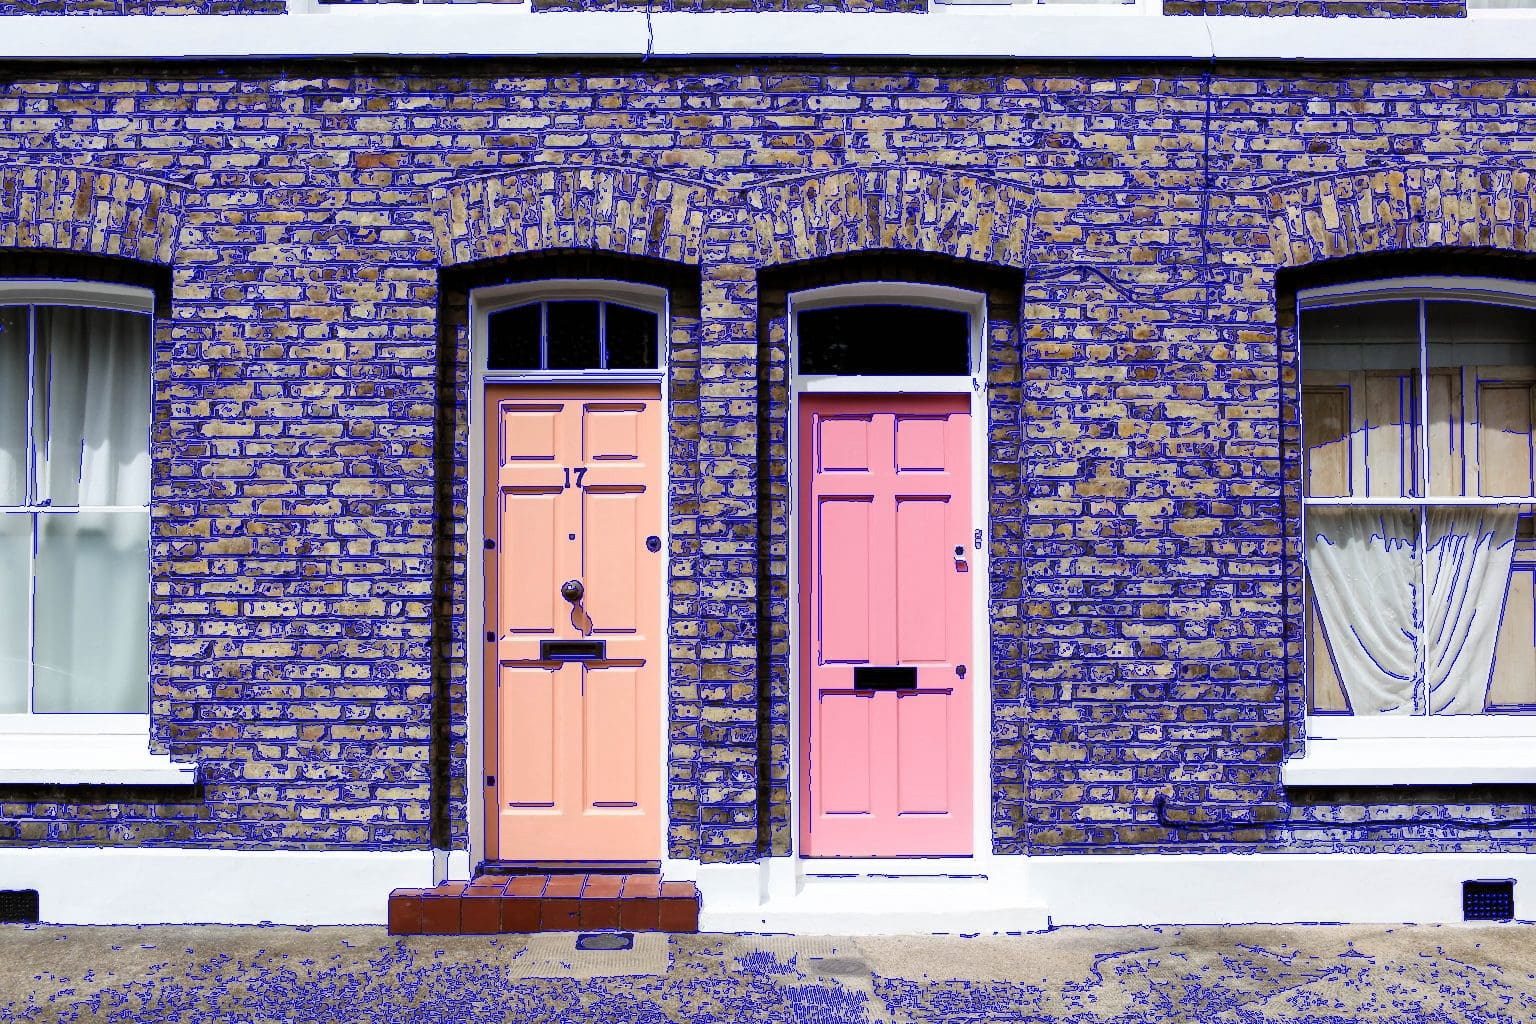

You should see the blue lines above marked the door and window and also outlined each brick. You adjust the two thresholds to see a different result.

## Harris Corner Detection in OpenCV

Harris Corner Detection is a method used to identify significant variations in intensity, which often correspond to the corners of objects in an image. OpenCV offers a simple and efficient implementation of this technique, allowing us to detect corners that serve as prominent features for image analysis and matching.

Extracting corners from an image can be done in three steps:

1. Convert the image into grayscale, because Harris corner detection algorithm works only on a single color channel
2. Run <code>cv2.cornerHarris(image, blockSize, ksize, k)</code> and get a score for every pixel
3. Identify which pixel is at the corner by comparing the score against the image maximum

The argument to <code>cornerHarris()</code> function include the neighborhood size <code>blockSize</code> and a kernel size <code>ksize</code>. Both are small positive integers but the latter must be an odd number. The final argument k is a positive floating point value that controls the sensitivity of corner detection. Too large such a value will make the algorithm mistake a corner as an edge. You may need to experiment with its value.

An example code, running Harris corner detection on the same image above:

In [20]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('image.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect corners using the Harris method
dst = cv2.cornerHarris(gray, 3, 5, 0.1)

# Create a boolean bitmap of corner positions
corners = dst > 0.05 * dst.max()

# Find the coordinates from the boolean bitmap
coord = np.argwhere(corners)

# Draw circles on the coordinates to mark the corners
for y, x in coord:
    cv2.circle(img, (x,y), 3, (0,0,255), -1)

# Display the image with corners
cv2.imshow('Harris Corners', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

The image produced will be as follows:

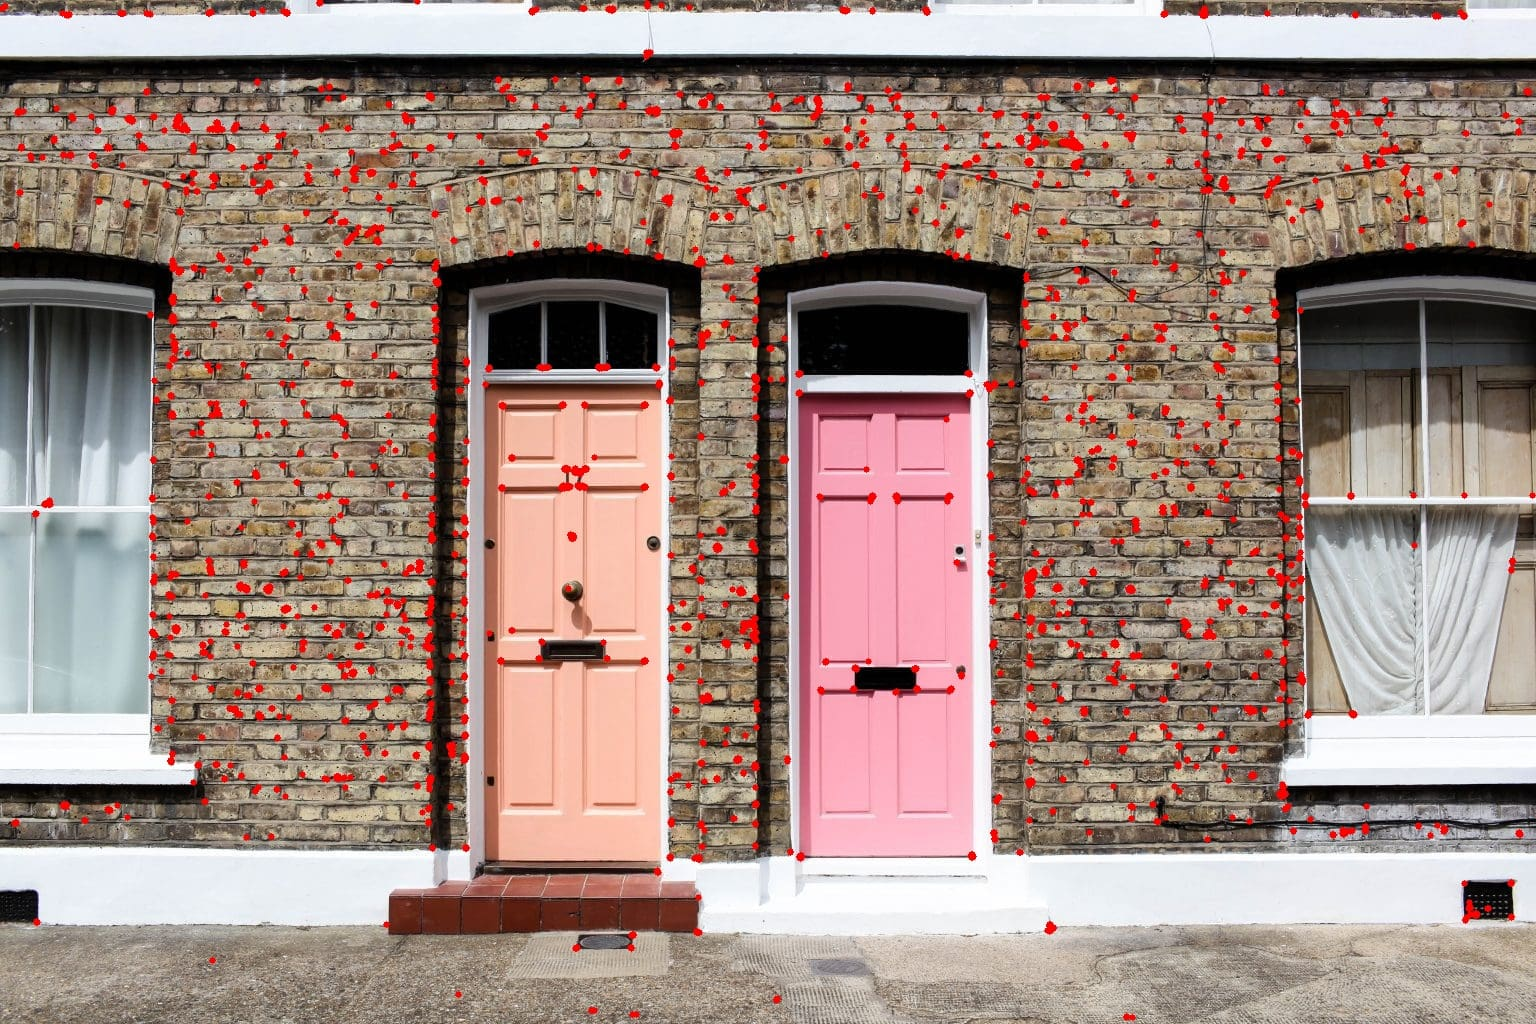

The red dots were drawn by the <code>cv2.circle()</code> function inside the for loop above. They are just for illustration. The key idea is that the algorithm gives a score of each pixel of the image to tell how much it is believed to be a corner, or on an edge, or “flat” (i.e., neither). You need to control the sensitivity of your conclusion by comparing the score to the maximum among the entire image, in the line

In [ ]:
corners = dst &gt; 0.05 * dst.max()

The result is a Boolean numpy array <code>corners</code>, which is then converted into an array of coordinates using the <code>np.argwhere()</code> function.

From the image above, you can see that Harris corner detection is not perfect, but if the corner is obvious enough, it can be detected.

## Summary

In this tutorial, you learned how to apply OpenCV’s Canny Edge Detection and Harris Corner Detection algorithms on an image

Specifically, you learned:

- These are pixel-based algorithms that classify each pixel into edge or non-edge, or corner or non-corner
- How to apply these algorithms using OpenCV functions to an image and interpret the result